In [1]:
#first we wantto import the different libraries that would be used in this EDA & hypothesis Testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

In [2]:
#import Data into Py
data=pd.read_csv('AxisInsurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#determine how many rows and columns the data set has
data.shape

(1338, 7)

In [4]:
#Checking for any missing values in the data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

From the above we can see that there are no missing values in this dataset


In [5]:
#display the data type of each column
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

From theabove we can see that age,bmi,children,charges columns have numeric datatype and sex,smoker,region columns have object datatype

In [6]:
#let's see how many males and females there are in the dataset
data['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

From the above we can see that there are 676 males and 662 females in this data set

In [7]:
#checking the summary of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:

1. From the above we can see that the youngest primary beneficiary is 18 yrs old.
2. the average bmi of beneficiaries is 30.6, the highest number of children covered by the insurance plan is 5.
3. The charges billed to insurance is spread over a huge range. Ranging from 1121 to 63,770.
4. The mean of bmi is close to the 75% percentile of the data, indicating a right skew.
5. The average BMI of beneficiaries is 30.6 with the max and 75th percentile of the BMI  at 34.6. 
6. The average number of children / dependents covered by the insurance plan is 1.


# Looking at the relationship between numerical variables using pair plots and correlation plots

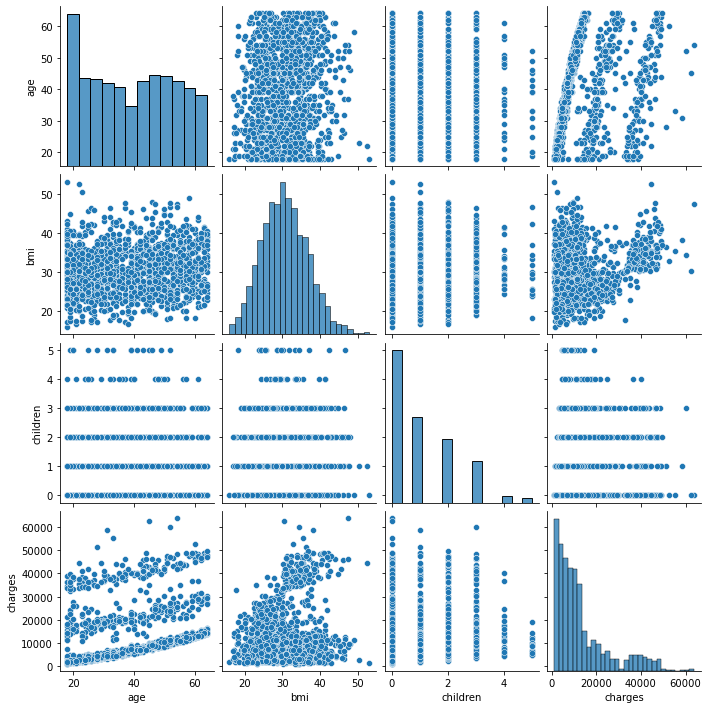

In [8]:
sns.pairplot(data)

In [9]:
correlation = data.corr() # creating a 2-D Matrix with correlation plots
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

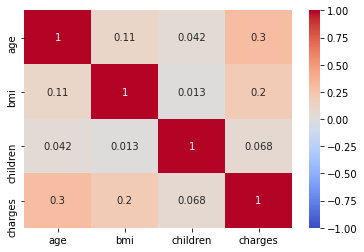

In [10]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


**Observations

1. Some high correlations observed are Age & charges, bmi & age and bmi &charges
2. We will explore those further below.


# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">  Univariate Analysis

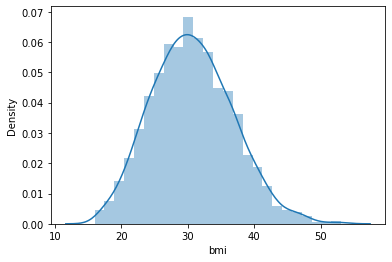

In [11]:
#more indepth look into the variables individually
#graphical representation of the distribution of bmi 
sns.distplot(data['bmi'])
plt.show()

<AxesSubplot:xlabel='bmi'>

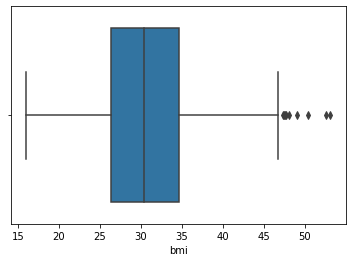

In [12]:
sns.boxplot(data.bmi)

**Observations;

1. From above graph we can see that bmi is normally distributed
2. Not so much outliers are recorded in the bmi


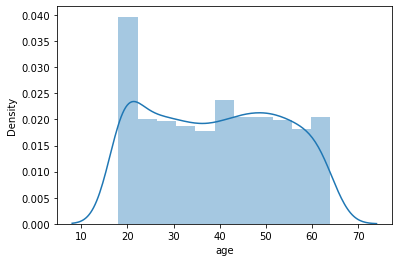

In [13]:
##graphical representation of the distribution of age 
sns.distplot(data['age'])
plt.show()

<AxesSubplot:xlabel='age'>

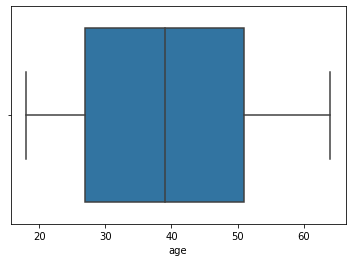

In [14]:
sns.boxplot(data.age)

**Observations;

1. From above graph we can see that age is normally distributed
2. There are no outliers recorded


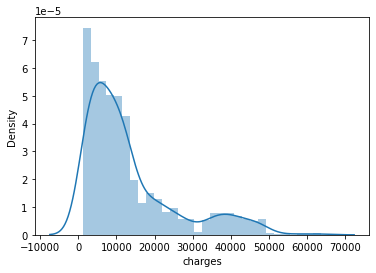

In [15]:
##graphical representation of the distribution of charges
sns.distplot(data['charges'])
plt.show()

<AxesSubplot:xlabel='charges'>

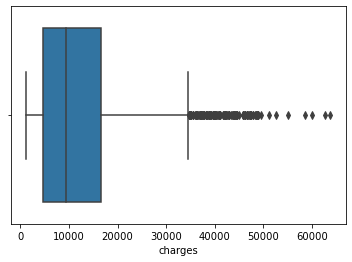

In [16]:
sns.boxplot(data.charges)

**Observations

1. From above graph we can see that charges are right skewed as long tail is at right side(mean>median)
2. There are a lot of outliers in this variable
3. Majority of the charges billed to the health insurance were closer to 10,000 but there were also some charges recorded as high as 60,000.


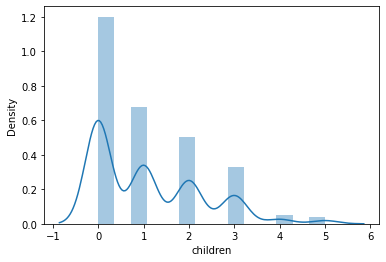

In [17]:
##graphical representation of the distribution of children
sns.distplot(data['children'])
plt.show()

<AxesSubplot:xlabel='children'>

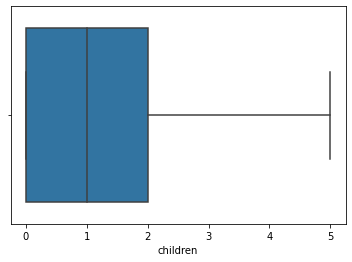

In [18]:
sns.boxplot(data.children)

**Observations

1. From above graph we can see that children is right skewed as long tail is at the right side.
2. Majority of the the people have 0-2 children.


## Exploring Medical claims made by Smokers VS non-smokers



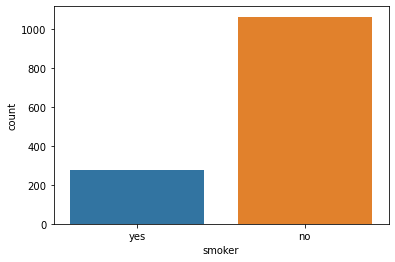

In [19]:
#let's see how many smokers and non-smokers
sns.countplot(data['smoker'])
plt.show()

In [20]:
#display how many are smokers and non smokers there are in the dataset
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
pd.crosstab(data['sex'],data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


**Observations
1. From the above we can see that there are 1064 non-smokers and 274 smokers in this data set
2. Out of those 1064 non smokers, 547 are female and 517 are males
3. Out of the 274 smokers 115 are females and 159 are males.

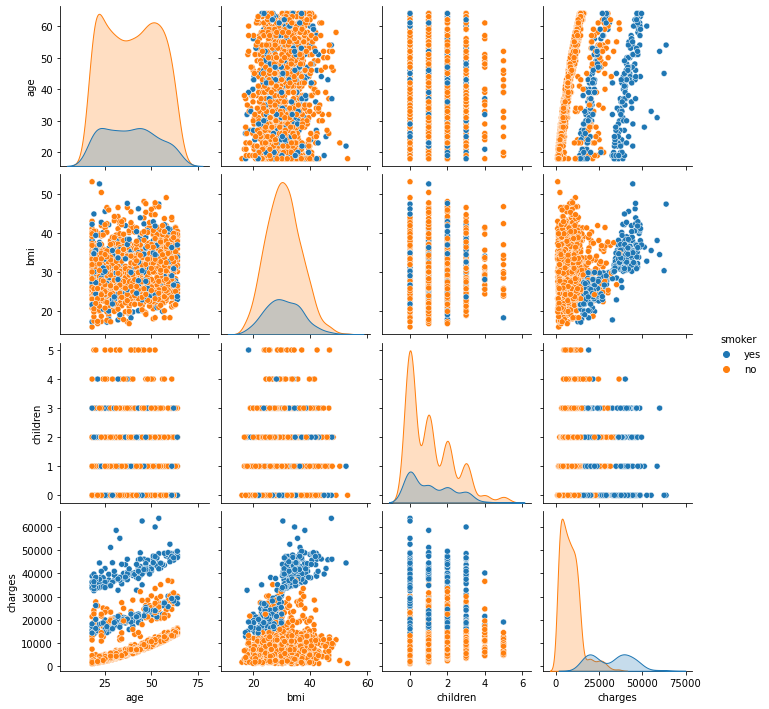

In [22]:
#lets explore further to understand the relationship of the all variables with smokers and non smokers
#for this we are going to use a pairplot 
sns.pairplot(data,hue='smoker')
plt.show()

<AxesSubplot:xlabel='charges', ylabel='charges'>

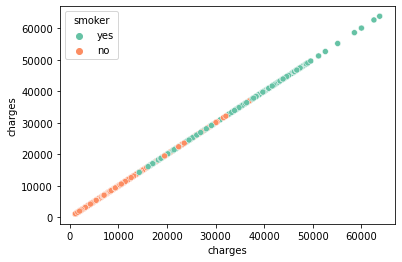

In [23]:
sns.scatterplot(data['charges'], data['charges'], hue=data['smoker'], palette='Set2')

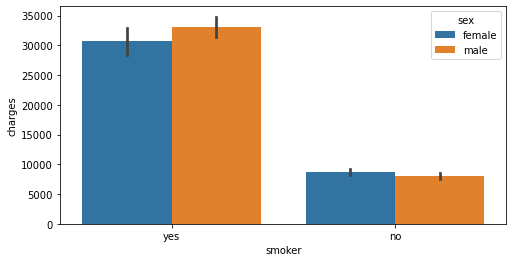

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='smoker',y='charges',hue='sex')
plt.show()

**Observations
1. It is evident that higher medical costs billed to health insurance came from smokers
2. The highest cost from non-smokers was around 45,000
3. The highest cost recorded for medical bill of around 60,000 was from smokers.

## Forming Hypothesis to Prove or disprove that that the medical claims made by the people who smoke is greater than those who don't.


In [25]:
#Null Hypothesis--> H0 = "smoking has no effect on charges"
#Alternate hypothesis--> H1 = "smoking has effect on charges" 

x = np.array(data[data['smoker'] == 'yes']['charges'])#selecting charges values corresponding to smoker as an array
y = np.array(data[data['smoker'] == 'no']['charges'])#selecting charges values corresponding to not smoker as an array
t,p_value = stats.ttest_ind(x,y,axis =0)#performing an independent T-test
if p_value <0.05:
    print("smoking has effect on charges(reject H0)")
else:
    print("smoking has no effect on charges (accept H0)")

smoking has effect on charges(reject H0)


** Observations

1. Per the hypothesis  testing above we can now confidently say that there is a direct correlation between smoking and charges
2. That is to say if there are more smokers there are higher chances of higher medical costs to insurance.
3. It is evident to see that indeed the medical claims made by the people who smoke is greater than those who don't.

## Exploring BMIs of Males VS Females

In [26]:
#let's explore BMI
#In seeking to understand if the BMIs of females is different males lets see how many males and females there are in the dataset
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

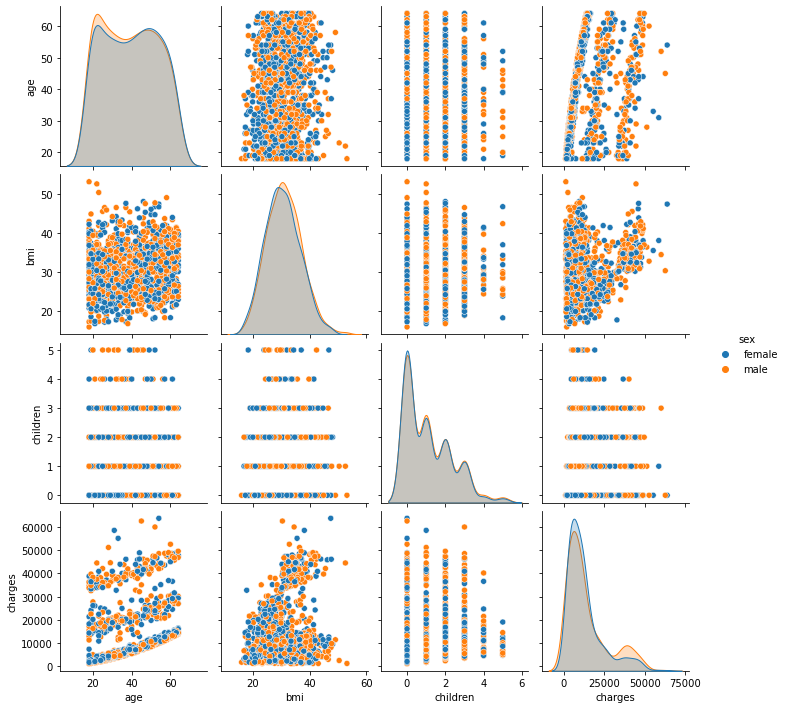

In [27]:
#lets explore further to understand the relationship of the BMI with males and females
#also other variables in relation to gender
#for this we are going to use a pairplot 
sns.pairplot(data,hue='sex')
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

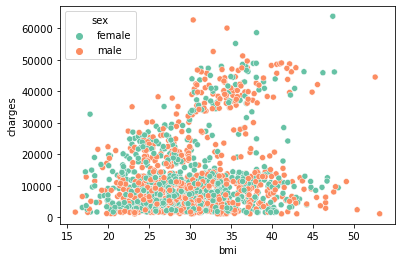

In [28]:
#More close up 
sns.scatterplot(data['bmi'], data['charges'], hue=data['sex'], palette='Set2')

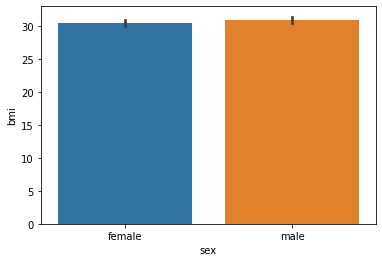

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(data=data,x='sex',y='bmi')
plt.show()

## Statistical evidence to prove or disprove that the BMI of females is different from that of males.

In [30]:
#Null Hypothesis--> H0 = "Gender has no effect on bmi"
#Alternate hypothesis--> H1 = "Gender has effect on bmi" 

x = np.array(data[data['sex'] == 'yes']['bmi'])#selecting charges values corresponding to smoker as an array
y = np.array(data[data['sex'] == 'no']['bmi'])#selecting charges values corresponding to not smoker as an array
t,p_value = stats.ttest_ind(x,y,axis =0)#performing an independent T-test
if p_value <0.05:
    print("Gender has effect on bmi(reject H0)")
else:
    print("Gender has no effect on bmi (accept H0)")

Gender has no effect on bmi (accept H0)


**Observations;

1. There are 662 females and 676 males.
2. It is evident that there are no stark differences in bmi between males and females.

## Exploring Proportion of smokers across Regions

In [31]:
#To further understand the date we have to deduce how many unique regions are there
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
#display the count of region
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

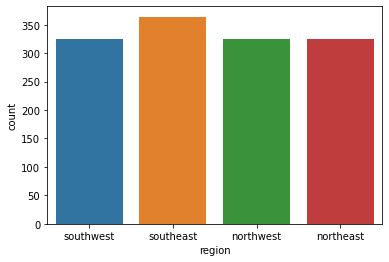

In [33]:
#display graphically the count of region
sns.countplot(data['region'])
plt.show()

In [34]:
#display the count of smokers and non-smokers by the region
pd.crosstab(data['region'],data['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


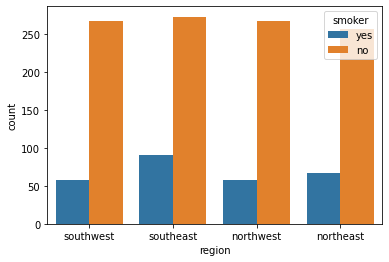

In [35]:
#display graphically the count of of smokers and non-smokers by the region
sns.countplot(data['region'],hue=data['smoker'])
plt.show()

In [36]:
#Let's see the number of smokers and non-smokers by gender
#Is the proportion of smokers significantly different in different genders?
pd.crosstab(data['smoker'],data['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


**Observations
1. There are 4 unique regions in this data set
2. There are around 300 beneficiaries in each region.
3. The smoker count is significantly less across the 4 different regions relative to non-smokers.
4. The non-smoker count seem to be proportionate to each other as compared to smokers.
5. It appears that there are more non-smokers across genders.
6. The count of smokers in northwest and southwest are the same both are at 58 smokers.

## Statistical evidence to prove or disprove that the proportion of smokers significantly different across different regions.

In [37]:
#Null Hypothesis--> H0 = "there is no difference in proportion of smokers in different regions"
#Alternate hypothesis--> H1 = "there is difference in proportion of smokers in different regions" 

# There are 547 females non-smokers and 115 females smokers
#There are 517 males non-smokers and 159 males smokers

#EV1= expected value of smoker=no and sex=female
#EV2 = expected value of smoker=no and sex= male
#EV3 = expected value of smoker=yes and sex= female
#EV4 = expected value of smoker=yes and sex= male

EV1 = 1064*(662/1338)
print("expected value of smoker=no and sex=female is {}".format(EV1))
EV2 = 1064*(676/1338)
print("expected value of smoker=no and sex= male is {}".format(EV2))
EV3 = 274*(662/1338)
print("expected value of smoker=yes and sex= female is {}".format(EV3))
EV4 = 274*(676/1338)
print("expected value of smoker=yes and sex= male is {}".format(EV4))

#chi-square = summation((observed-expected)^2/expected)
chiEV1 = np.square(547-EV1)/EV1
print("chiEV1 is {}".format(chiEV1))
chiEV2 = np.square(517-EV2)/EV2
print("chiEV2 is {}".format(chiEV2))
chiEV3 = np.square(115-EV3)/EV3
print("chiEV3 is {}".format(chiEV3))
chiEV4 = np.square(159-EV4)/EV4
print("chiEV4 is {}".format(chiEV4))

chisquare = chiEV1+chiEV2+chiEV3+chiEV4
print("chi-square is {}".format(chisquare))

degree_of_freedom = (2-1)*(2-1)
print("degree of freedom is {}".format(degree_of_freedom))

#Now that the chi square value and degree of freedom ,we would use a chi-square table to check if 
#the chi square statistics of 7.76 exceeds the critical value of the chi square distribution, 
#The critical value for alpha of 0.05(95% confidence) is 3.84
#since the statistics is much larger than 3.84, we have sufficient evidence to reject the H0(null hypothesis)

if chisquare<3.84:
    print("There is no difference in proportion of smokers in different regions(accept H0)")
else:
    print("There is difference in proportion of smokers in different regions(reject H0)")

expected value of smoker=no and sex=female is 526.4334828101644
expected value of smoker=no and sex= male is 537.5665171898356
expected value of smoker=yes and sex= female is 135.56651718983557
expected value of smoker=yes and sex= male is 138.43348281016443
chiEV1 is 0.8034854224352866
chiEV2 is 0.7868451917931356
chiEV3 is 3.120103976172045
chiEV4 is 3.0554864382039844
chi-square is 7.765921028604452
degree of freedom is 1
There is difference in proportion of smokers in different regions(reject H0)


**Observations;

1. There is difference in proportion of smokers in different regions
2. We will reject null hypothesis

## Is the mean BMI of women with no children, one child, and two children the same?

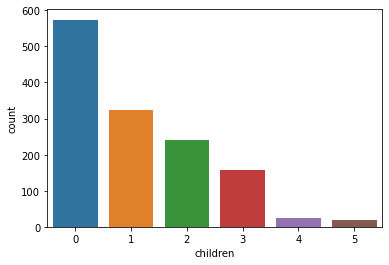

In [38]:
# To answer this question let's see the number of children
sns.countplot(data['children'])
plt.show()

In [39]:
#In order to properly dissect and answer this question, it is important
#to filter the data to only show data of women having <=2 children
d1 = data[(data['children']<=2) & (data['sex']=='female')]
d1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [40]:
#i would further breakdown the dataframe frame to show only data of women with 0,1 and 2 children respectively
#this step is optional but for better analysis I would be using this method
df1 = data[(data['children']==0) & (data['sex']=='female')]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [41]:
df2 = data[(data['children']==1) & (data['sex']=='female')]
df2

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.440,1,no,southeast,8240.58960
16,52,female,30.780,1,no,northeast,10797.33620
21,30,female,32.400,1,no,southwest,4149.73600
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
...,...,...,...,...,...,...,...
1262,41,female,28.050,1,no,southeast,6770.19250
1263,43,female,29.900,1,no,southwest,7337.74800
1287,36,female,25.900,1,no,southwest,5472.44900
1299,19,female,25.745,1,no,northwest,2710.82855


In [42]:
df3 = data[(data['children']==2) & (data['sex']=='female')]
df3

,age,sex,bmi,children,smoker,region,charges
27,55,female,32.775,2,no,northwest,12268.63225
41,31,female,36.630,2,no,southeast,4949.75870
43,37,female,30.800,2,no,southeast,6313.75900
46,18,female,38.665,2,no,northeast,3393.35635
51,21,female,33.630,2,no,northwest,3579.82870
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1319,39,female,26.315,2,no,northwest,7201.70085
1323,42,female,40.370,2,yes,southeast,43896.37630
1328,23,female,24.225,2,no,northeast,22395.74424


In [43]:
#Now that i have all 3 dataframes I will proceed to look at the means of the individual dataframes containing data 
#of women with 0,1 & 2 children respectively.
#display mean bmi for all 3 dataframes
print(df1.bmi.mean())
print(df2.bmi.mean())
print(df3.bmi.mean())

30.361522491349486
30.05265822784811
30.64978991596637


**Observations;
1. The mean bmi for all 3 groups seem to be relatively the same. 
2. The mean bmi of women with 2 children is slighly higher than the other 2 by a few decimals.

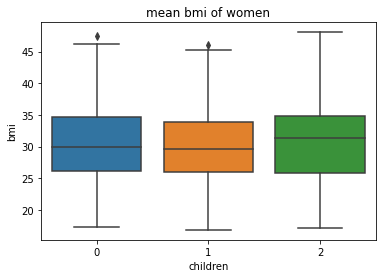

In [44]:
#graphical respresentation of mean bmi
sns.boxplot(x = "children", y = "bmi", data = d1)
plt.title('mean bmi of women')
plt.show()

**Observations;

1. the boxplot show smilar shapes and spreads
2. There are no outliers

# Statistical evidence to prove or disprove that the mean BMI of women with no children, one child, and two children are the same.

In [45]:
#Null Hypothesis--> H0 = "The distribution of bmi across women with no children,one child and two children is not same"
#Alternate hypothesis--> H1 = "The distribution of bmi across women with no children,one child and two children is same"

#make the data frame of females having 0,1 & 2 children
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 


In [46]:
# Ordinary Least Squares (OLS) model
mod = ols('bmi ~ children', data = d1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
if p_value<0.05:
    print("The distribution of bmi across women with no children,one child and two children is not same(accept H0)")
else:
    print("The distribution of bmi across women with no children,one child and two children is same(reject H0)")

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN
The distribution of bmi across women with no children,one child and two children is same(reject H0)


**Observations

1. we can see that p_value is 0.79
2. The distribution of bmi across women with no children,one child and two children is the same.
3. We would reject null hypothesis.